In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# data = pd.read_csv(r"C:\Users\Admin\Desktop\Аналитика\ML\ML.csv")
data = pd.read_csv('ml1.csv')
tmp_df = data.copy()
tmp_df = tmp_df.dropna(subset=['car_num'], inplace=False)  # Delete NaN
data = tmp_df.astype(int) # Change type on integer
data_c = data
print(data.dtypes)

company_id    int32
car_num       int32
activity      int32
deal_num      int32
VAL           int32
abon          int32
LTV           int32
dtype: object


In [4]:
data.isnull().any()

company_id    False
car_num       False
activity      False
deal_num      False
VAL           False
abon          False
LTV           False
dtype: bool

<AxesSubplot:>

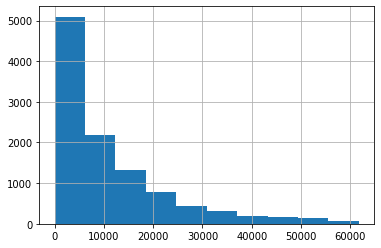

In [5]:
data['LTV'].hist()

In [6]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [7]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

x = data[['car_num', 'activity', 'LTV']].values # Defenite 3 features for model
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) # Set model
km.fit(x) 
labels = km.labels_
centroids = km.cluster_centers_

print(data)

with pd.ExcelWriter("path_to_file.xlsx") as writer: 
    data.to_excel(writer)  

data['labels'] =  labels # Plot:
trace1 = go.Scatter3d(
    x= data['car_num'], # Axis x,y,z and their features
    y= data['activity'],
    z= data['LTV'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 10
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Clustering parnters',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'car_num'),
            yaxis = dict(title  = 'activity'),
            zaxis = dict(title  = 'LTV')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

       company_id  car_num  activity  deal_num    VAL   abon    LTV
0           29922        0       880         1   1133      0   1133
1           29910        0       880         1   1396      0   1396
2           29907        0       880         1   1133      0   1133
3           29903        0       880         1   1133      0   1133
4           29895        1       229         5   8570      0   8570
...           ...      ...       ...       ...    ...    ...    ...
10726          63        4       241        17  32863    450  33313
10727          59        6       229        17  28597    900  29497
10728          49        2       229        12  20629    450  21079
10729          43      200       238         4  13255  21100  34355
10730          29        0       229         1    750    450   1200

[10714 rows x 7 columns]


In [142]:
distortions = []
df = data_c
K = range(1,10) # Method Elbow need that defenite number of clusters
for k in K: 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

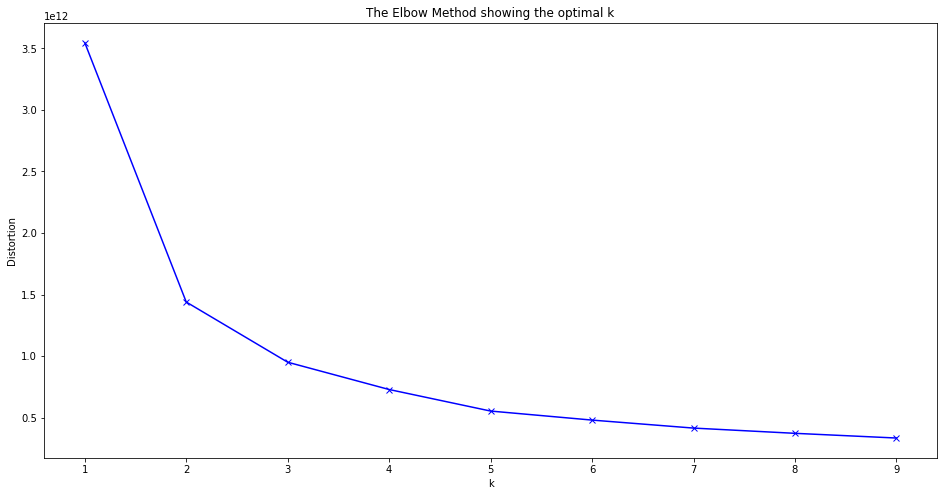

In [143]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [144]:
X_pred = km.predict(x) # Export clustering data
X_pred = pd.DataFrame(X_pred)

print(X_pred)

data = pd.read_csv('ml1.csv') # Load original data

y = pd.merge(data, X_pred, left_index=True, right_index=True) # Merge

print(y)

with pd.ExcelWriter("path_to_file.xlsx") as writer:
    y.to_excel(writer)  # Export result in Excel

       0
0      0
1      0
2      0
3      0
4      0
...   ..
10709  1
10710  1
10711  2
10712  1
10713  0

[10714 rows x 1 columns]
       company_id  car_num  activity  deal_num    VAL   abon    LTV  0
0           29922      0.0       880         1   1133      0   1133  0
1           29910      0.0       880         1   1396      0   1396  0
2           29907      0.0       880         1   1133      0   1133  0
3           29903      0.0       880         1   1133      0   1133  0
4           29895      1.0       229         5   8570      0   8570  0
...           ...      ...       ...       ...    ...    ...    ... ..
10709         192      0.0       240         9  45474  11250  56724  1
10710         190     33.0       229        17  45674   4000  49674  1
10711         188      0.0       229        22  47725   1350  49075  2
10712         180      7.0       241        13  26179    900  27079  1
10713         162     13.0       229        18  35960   3600  39560  0

[10714 rows x